In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance
from itertools import cycle, product
import pickle

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/working project/model.csv')
df = df.drop(columns=['Unnamed: 0'])
df
# x = df.copy().drop
# y = df["output"]

,output,ATSC1c,PNSA-3,maxaasC,minwHBa,GATS2c,minaasC,maxsssN,WNSA-3,FNSA-2,...,TDB7r,VE3_Dzp,GATS1s,nT11Ring.1,AATSC0v,MLFER_S,nRotB,minaasC.1,MOMI-Y,maxsssN.1
0,0,-0.519992,-42.144042,0.721699,0.257486,0.787255,0.257486,0.000000,-26.888072,-0.581634,...,1.965056,-5.311764,1.038476,0.0,47.110797,2.875,4.0,0.257486,4123.596732,0.000000
1,0,-1.784877,-144.195115,0.000000,0.022477,1.056076,0.000000,0.000000,-132.539028,-3.037136,...,1.704824,-13.316748,1.167922,0.0,43.210006,4.305,9.0,0.000000,23472.158794,0.000000
2,0,-0.388801,-36.610552,0.562984,-0.160754,1.028763,0.382701,0.000000,-25.580454,-0.475069,...,1.606964,-2.532953,0.721691,0.0,48.748584,2.391,11.0,0.382701,7183.242391,0.000000
3,0,-0.294219,-27.067351,0.691844,-0.123681,1.067238,0.595971,2.250157,-17.503710,-0.376043,...,1.806905,-2.731202,0.571325,0.0,48.996384,2.543,9.0,0.595971,5290.873730,2.250157
4,0,-0.459960,-50.443388,1.309343,-1.155578,0.895979,0.791482,0.000000,-31.096123,-0.950464,...,2.174679,-1.412527,0.681507,0.0,48.738100,2.464,7.0,0.791482,3317.195235,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,1,-0.177103,-31.301532,0.415936,0.415936,0.693452,0.415936,0.000000,-12.858006,-0.501106,...,1.666877,-4.922378,0.885511,0.0,46.794183,1.904,2.0,0.415936,1262.590041,0.000000
935,1,-0.505029,-49.695460,1.126674,-0.467371,1.149942,0.187124,2.148889,-32.522993,-0.873956,...,2.143312,-2.072911,0.534198,0.0,46.088854,2.794,4.0,0.187124,4153.862685,2.148889
936,1,-0.067529,-26.547006,2.373365,1.267377,1.754367,1.593780,2.211811,-17.708001,-0.434188,...,1.981315,-0.399843,1.006717,2.0,54.205720,1.912,4.0,1.593780,3093.867098,2.211811
937,1,-0.068801,-25.399476,2.391228,1.255953,1.763790,1.609319,2.209183,-16.805630,-0.418682,...,1.967248,-0.411611,1.006717,2.0,54.205720,1.912,4.0,1.609319,3831.882083,2.209183


In [ ]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(0)
df

,output,ATSC1c,PNSA-3,maxaasC,minwHBa,GATS2c,minaasC,maxsssN,WNSA-3,FNSA-2,...,TDB7r,VE3_Dzp,GATS1s,nT11Ring.1,AATSC0v,MLFER_S,nRotB,minaasC.1,MOMI-Y,maxsssN.1
0,0,-0.519992,-42.144042,0.721699,0.257486,0.787255,0.257486,0.000000,-26.888072,-0.581634,...,1.965056,-5.311764,1.038476,0.0,47.110797,2.875,4.0,0.257486,4123.596732,0.000000
1,0,-1.784877,-144.195115,0.000000,0.022477,1.056076,0.000000,0.000000,-132.539028,-3.037136,...,1.704824,-13.316748,1.167922,0.0,43.210006,4.305,9.0,0.000000,23472.158794,0.000000
2,0,-0.388801,-36.610552,0.562984,-0.160754,1.028763,0.382701,0.000000,-25.580454,-0.475069,...,1.606964,-2.532953,0.721691,0.0,48.748584,2.391,11.0,0.382701,7183.242391,0.000000
3,0,-0.294219,-27.067351,0.691844,-0.123681,1.067238,0.595971,2.250157,-17.503710,-0.376043,...,1.806905,-2.731202,0.571325,0.0,48.996384,2.543,9.0,0.595971,5290.873730,2.250157
4,0,-0.459960,-50.443388,1.309343,-1.155578,0.895979,0.791482,0.000000,-31.096123,-0.950464,...,2.174679,-1.412527,0.681507,0.0,48.738100,2.464,7.0,0.791482,3317.195235,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,1,-0.177103,-31.301532,0.415936,0.415936,0.693452,0.415936,0.000000,-12.858006,-0.501106,...,1.666877,-4.922378,0.885511,0.0,46.794183,1.904,2.0,0.415936,1262.590041,0.000000
935,1,-0.505029,-49.695460,1.126674,-0.467371,1.149942,0.187124,2.148889,-32.522993,-0.873956,...,2.143312,-2.072911,0.534198,0.0,46.088854,2.794,4.0,0.187124,4153.862685,2.148889
936,1,-0.067529,-26.547006,2.373365,1.267377,1.754367,1.593780,2.211811,-17.708001,-0.434188,...,1.981315,-0.399843,1.006717,2.0,54.205720,1.912,4.0,1.593780,3093.867098,2.211811
937,1,-0.068801,-25.399476,2.391228,1.255953,1.763790,1.609319,2.209183,-16.805630,-0.418682,...,1.967248,-0.411611,1.006717,2.0,54.205720,1.912,4.0,1.609319,3831.882083,2.209183


In [ ]:
df.columns

Index(['output', 'ATSC1c', 'PNSA-3', 'maxaasC', 'minwHBa', 'GATS2c', 'minaasC',
       'maxsssN', 'WNSA-3', 'FNSA-2', 'SM1_Dzv', 'minsssN', 'SaasC',
       'nT11Ring', 'nF11Ring', 'RHSA', 'RPSA', 'ATSC0c', 'PPSA-3', 'nHBDon',
       'ATSC0e', 'DELS', 'nHBd', 'DELS2', 'ETA_Eta_B', 'nHBAcc2',
       'nHBAcc_Lipinski', 'ATS0s', 'WTPT-4', 'nHBAcc3', 'SM1_Dze', 'nO',
       'SHBa', 'ATSC0s', 'TPSA', 'DPSA-3', 'TopoPSA', 'ATSC8v', 'ATSC0s.1',
       'maxHBint8', 'nHBint6', 'RDF70v', 'AATSC4v', 'TDB9p', 'RDF65p',
       'nBondsD2', 'JGI8', 'SCH-7', 'MLFER_L', 'SpMin5_Bhv', 'VR2_Dzi', 'RPCG',
       'SpMin2_Bhi', 'MAXDP', 'nHBint2', 'ATSC7c', 'MATS3s', 'E2m',
       'ETA_BetaP_ns_d', 'JGI6', 'TDB2e', 'TDB2s', 'E3i', 'ATSC7v',
       'minwHBa.1', 'VR3_Dzm', 'ATSC8s', 'SpMax1_Bhi', 'JGI3', 'AATSC1i',
       'MATS3e', 'AATSC1p', 'Dp', 'MIC0', 'mindO', 'E2e', 'BCUTp-1l',
       'SHBint8', 'SHBint4', 'BCUTw-1l', 'AATSC7m', 'SdssC', 'TDB7r',
       'VE3_Dzp', 'GATS1s', 'nT11Ring.1', 'AATSC0v', 'MLFE

In [ ]:
df1 = df['output']
df1

0      0
1      0
2      0
3      0
4      0
      ..
934    1
935    1
936    1
937    1
938    1
Name: output, Length: 939, dtype: int64

In [ ]:
df0=df.drop(columns=['output'])
X_raw = df0.loc[:, df0.columns].values
y = df1.values
print("X array shape =", X_raw.shape, X_raw.dtype)
print("y array shape =", y.shape, y.dtype)

X array shape = (939, 91) float64
y array shape = (939,) int64


In [ ]:
# feature normalization
# Normalization fit X_raw
transformer = MinMaxScaler().fit(X_raw)
# transform X_raw to normalized (X)
X = transformer.transform(X_raw)
print("Normalized X =", X)

Normalized X = [[0.845773   0.7293839  0.26904193 ... 0.44100197 0.04020068 0.        ]
 [0.48239952 0.         0.         ... 0.37738683 0.23504503 0.        ]
 [0.88346139 0.7689331  0.20987474 ... 0.47193799 0.071012   0.        ]
 ...
 [0.97575586 0.84085972 0.88476624 ... 0.77115036 0.02983107 0.53677601]
 [0.97539025 0.8490614  0.89142532 ... 0.77498942 0.03726305 0.53613824]
 [0.95340783 0.8490614  0.62871492 ... 0.75260569 0.03726305 0.62462319]]


In [ ]:
# check 5-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=33)
for i, (train_index, valid_index) in enumerate(skf.split(X, y)):
    print(f"Fold {i}:")
    X_train = X[train_index]
    y_train = y[train_index]
    X_valid = X[valid_index]
    y_valid = y[valid_index]
    print("X_train shape =", X_train.shape, "\t y_train shape =", y_train.shape)
    print("X_valid shape =", X_valid.shape, "\t y_valid shape =", y_valid.shape)

Fold 0:
X_train shape = (751, 91) 	 y_train shape = (751,)
X_valid shape = (188, 91) 	 y_valid shape = (188,)
Fold 1:
X_train shape = (751, 91) 	 y_train shape = (751,)
X_valid shape = (188, 91) 	 y_valid shape = (188,)
Fold 2:
X_train shape = (751, 91) 	 y_train shape = (751,)
X_valid shape = (188, 91) 	 y_valid shape = (188,)
Fold 3:
X_train shape = (751, 91) 	 y_train shape = (751,)
X_valid shape = (188, 91) 	 y_valid shape = (188,)
Fold 4:
X_train shape = (752, 91) 	 y_train shape = (752,)
X_valid shape = (187, 91) 	 y_valid shape = (187,)


In [ ]:
# Support Vector Machine (SVM)
from sklearn.svm import SVC



models_list = []  # total 5 models
y_true_list = []
y_prob_list = []

# train with 5-fold
for i, (train_index, valid_index) in enumerate(skf.split(X, y)):
    print(f"[Fold {i}]")
    X_train = X[train_index].astype('float32')
    y_train = y[train_index].astype('float32')
    X_valid = X[valid_index].astype('float32')
    y_valid = y[valid_index].astype('float32')
    print("X_train shape =", X_train.shape, X_train.dtype, "\t y_train shape =", y_train.shape, y_train.dtype)
    print("X_valid shape =", X_valid.shape, X_valid.dtype, "\t y_valid shape =", y_valid.shape, y_valid.dtype)
    # train model
    model = SVC(C=7.0, kernel='rbf', probability=True)
    model.fit(X_train, y_train)
    # predict probability
    y_true = y_valid
    y_prob = model.predict_proba(X_valid)  # pred:[class0, class1]
    print("model output shape =", y_prob.shape)
    y_prob = y_prob[:, 1]  # use class1 as single output
    # append to list
    models_list.append(model)
    y_true_list.append(y_true)
    y_prob_list.append(y_prob)
    # classification report from single model (with threshold 0.5)
    print(classification_report(y_true, y_prob > 0.5))
    # break

[Fold 0]
X_train shape = (751, 91) float32 	 y_train shape = (751,) float32
X_valid shape = (188, 91) float32 	 y_valid shape = (188,) float32
model output shape = (188, 2)
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90       125
         1.0       0.79      0.79      0.79        63

    accuracy                           0.86       188
   macro avg       0.84      0.84      0.84       188
weighted avg       0.86      0.86      0.86       188

[Fold 1]
X_train shape = (751, 91) float32 	 y_train shape = (751,) float32
X_valid shape = (188, 91) float32 	 y_valid shape = (188,) float32
model output shape = (188, 2)
              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89       125
         1.0       0.82      0.71      0.76        63

    accuracy                           0.85       188
   macro avg       0.84      0.82      0.83       188
weighted avg       0.85      0.85      0.85       188



In [ ]:
from sklearn.metrics.pairwise import distance
from sklearn.neighbors import KNeighborsClassifier
models_list = []  # total 5 models
y_true_list = []
y_prob_list = []


# train with 5-fold
for i, (train_index, valid_index) in enumerate(skf.split(X, y)):
    print(f"[Fold {i}]")
    X_train = X[train_index].astype('float32')
    y_train = y[train_index].astype('float32')
    X_valid = X[valid_index].astype('float32')
    y_valid = y[valid_index].astype('float32')
    print("X_train shape =", X_train.shape, X_train.dtype, "\t y_train shape =", y_train.shape, y_train.dtype)
    print("X_valid shape =", X_valid.shape, X_valid.dtype, "\t y_valid shape =", y_valid.shape, y_valid.dtype)

    model = KNeighborsClassifier(n_neighbors=5,weights='distance')
    model.fit(X_train, y_train)
    y_true = y_valid
    y_prob = model.predict_proba(X_valid)  # pred:[class0, class1]
    print("model output shape =", y_prob.shape)
    y_prob = y_prob[:, 1]  # use class1 as single output
    # append to list
    models_list.append(model)
    y_true_list.append(y_true)
    y_prob_list.append(y_prob)
    # classification report from single model (with threshold 0.5)
    print(classification_report(y_true, y_prob > 0.5))

[Fold 0]
X_train shape = (751, 91) float32 	 y_train shape = (751,) float32
X_valid shape = (188, 91) float32 	 y_valid shape = (188,) float32
model output shape = (188, 2)
              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91       125
         1.0       0.80      0.84      0.82        63

    accuracy                           0.88       188
   macro avg       0.86      0.87      0.86       188
weighted avg       0.88      0.88      0.88       188

[Fold 1]
X_train shape = (751, 91) float32 	 y_train shape = (751,) float32
X_valid shape = (188, 91) float32 	 y_valid shape = (188,) float32
model output shape = (188, 2)
              precision    recall  f1-score   support

         0.0       0.91      0.90      0.90       125
         1.0       0.80      0.83      0.81        63

    accuracy                           0.87       188
   macro avg       0.86      0.86      0.86       188
weighted avg       0.87      0.87      0.87       188



In [ ]:
from sklearn import datasets
from sklearn.ensemble import VotingClassifier
from sklearn.metrics.pairwise import distance
from sklearn.neighbors import KNeighborsClassifier
models_list = []  # total 5 models
y_true_list = []
y_prob_list = []

clf2 = KNeighborsClassifier(n_neighbors=5,weights='distance')
clf3 = SVC(C=7.0, kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[ ('knn', clf2), ('svc', clf3)],voting='soft', weights=[ 1, 2])


# train with 5-fold
for i, (train_index, valid_index) in enumerate(skf.split(X, y)):
    print(f"[Fold {i}]")
    X_train = X[train_index].astype('float32')
    y_train = y[train_index].astype('float32')
    X_valid = X[valid_index].astype('float32')
    y_valid = y[valid_index].astype('float32')
    print("X_train shape =", X_train.shape, X_train.dtype, "\t y_train shape =", y_train.shape, y_train.dtype)
    print("X_valid shape =", X_valid.shape, X_valid.dtype, "\t y_valid shape =", y_valid.shape, y_valid.dtype)

    eclf.fit(X_train, y_train)
    y_true = y_valid
    y_prob = model.predict_proba(X_valid)  # pred:[class0, class1]
    print("model output shape =", y_prob.shape)
    y_prob = y_prob[:, 1]  # use class1 as single output
    # append to list
    models_list.append(model)
    y_true_list.append(y_true)
    y_prob_list.append(y_prob)
    # classification report from single model (with threshold 0.5)
    print(classification_report(y_true, y_prob > 0.5))


[Fold 0]
X_train shape = (751, 91) float32 	 y_train shape = (751,) float32
X_valid shape = (188, 91) float32 	 y_valid shape = (188,) float32
model output shape = (188, 2)
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       125
         1.0       1.00      1.00      1.00        63

    accuracy                           1.00       188
   macro avg       1.00      1.00      1.00       188
weighted avg       1.00      1.00      1.00       188

[Fold 1]
X_train shape = (751, 91) float32 	 y_train shape = (751,) float32
X_valid shape = (188, 91) float32 	 y_valid shape = (188,) float32
model output shape = (188, 2)
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       125
         1.0       1.00      1.00      1.00        63

    accuracy                           1.00       188
   macro avg       1.00      1.00      1.00       188
weighted avg       1.00      1.00      1.00       188



In [ ]:
# all valid data
y_true_arr = np.concatenate(y_true_list)
y_prob_arr = np.concatenate(y_prob_list)
print("All y_true_arr shape =", y_true_arr.shape, y_true_arr[:5])
print("All y_prob_arr shape =", y_prob_arr.shape, y_prob_arr[:5])

All y_true_arr shape = (939,) [0. 0. 0. 0. 0.]
All y_prob_arr shape = (939,) [0.00000000e+00 9.66193133e-08 0.00000000e+00 3.48705825e-07
 1.49671845e-07]


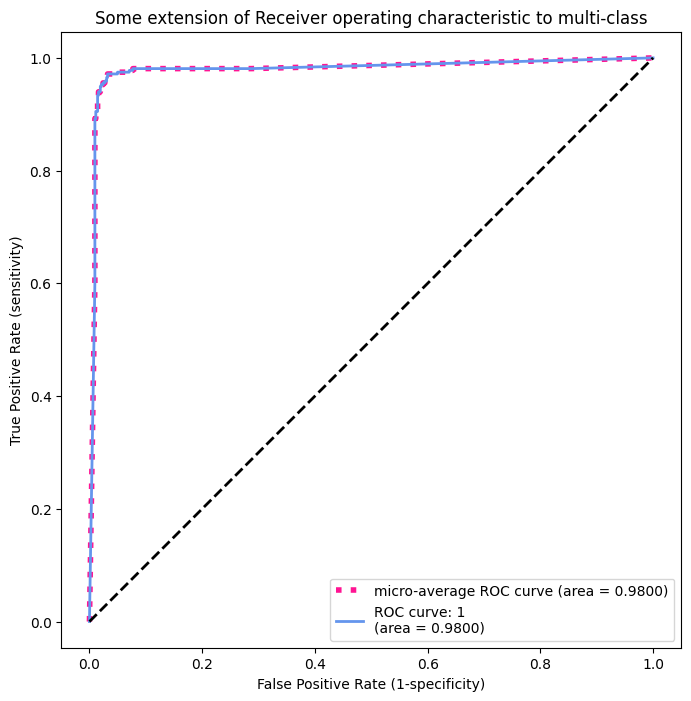

AUROC = 0.9799916695450759
optimal_threshold (micro) = 0.29642475080139596


In [ ]:
# plot ROC
def calculate_roc(y_true, y_prob, CLASSES=[1], micro_avg=True, marco_avg=False, ):

    # 分別算出每一類別的 FPR(假陽率) TPR(真陽率) AUC(roc_curve底下的面積)
    N_CLASSES = len(CLASSES)
    y_true = y_true.reshape((-1, N_CLASSES))
    y_prob = y_prob.reshape((-1, N_CLASSES))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    thresholds = dict()
    lw = 2
    for i in range(N_CLASSES):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_prob[:, i])  # <--
        roc_auc[i] = auc(fpr[i], tpr[i])

    if micro_avg == True:
        # 計算 微觀平均曲線
        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], thresholds["micro"] = roc_curve(y_true.ravel(), y_prob.ravel())  # <--
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    if marco_avg == True:
        # 計算 宏觀平均曲線
        # Compute macro-average ROC curve and ROC area

        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(N_CLASSES)]))

        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(N_CLASSES):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])

        # Finally average it and compute AUC
        mean_tpr /= N_CLASSES

        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    #### 畫出所有 ROC 曲線 ####
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)

    if micro_avg == True:
        plt.plot(fpr["micro"], tpr["micro"],
                label='micro-average ROC curve (area = {0:0.4f})'
                    ''.format(roc_auc["micro"]),
                color='deeppink', linestyle=':', linewidth=4)

    if marco_avg == True:
        plt.plot(fpr["macro"], tpr["macro"],
                label='macro-average ROC curve (area = {0:0.4f})'
                    ''.format(roc_auc["macro"]),
                color='navy', linestyle=':', linewidth=4)

    colors = cycle(['cornflowerblue', 'green', 'darkorange', 'red'])
    for i, color in zip(range(N_CLASSES), colors):
        ax.plot(fpr[i], tpr[i], color=color, lw=lw,
                label='ROC curve: {0}\n(area = {1:0.4f})'
                ''.format(CLASSES[i], roc_auc[i]))

    ax.plot([0, 1], [0, 1], 'k--', lw=lw)
    ax.set(xlim=(0.0, 1.0), ylim=(0.0, 1.0))
    ax.axis('equal')
    ax.set_xlabel('False Positive Rate (1-specificity)')
    ax.set_ylabel('True Positive Rate (sensitivity)')
    ax.set_title('Some extension of Receiver operating characteristic to multi-class')
    ax.legend(loc="lower right")
    plt.show()

    # 平衡點 (micro average)
    optimal_idx = np.argmax(tpr["micro"] - fpr["micro"])
    optimal_threshold = thresholds["micro"][optimal_idx + 1]
    return roc_auc, optimal_threshold

# function test:
roc_auc, optimal_threshold = calculate_roc(y_true_arr, y_prob_arr)
print("AUROC =", roc_auc['micro'])
print("optimal_threshold (micro) =", optimal_threshold)

data prepare

In [ ]:
df2 =pd.read_csv('/content/drive/MyDrive/working project/model_test.csv')
df2 = df2.drop(columns=['Unnamed: 0'])
df2

,ATSC1c,PNSA-3,maxaasC,minwHBa,GATS2c,minaasC,maxsssN,WNSA-3,FNSA-2,SM1_Dzv,...,TDB7r,VE3_Dzp,GATS1s,nT11Ring.1,AATSC0v,MLFER_S,nRotB,minaasC.1,MOMI-Y,maxsssN.1
0,-0.059494,-7.481324,1.495324,1.445556,1.236948,1.445556,0.000000,-3.502420,-0.177814,-3.193246e-01,...,1.366120,-6.481056,1.140882,2.0,54.623562,1.378,0.0,1.445556,1209.156279,0.000000
1,-1.235153,-98.502612,0.000000,-0.335688,0.000000,0.000000,0.000000,-127.011747,-1.567073,-5.585923e+00,...,1.647874,-3.175474,0.956318,0.0,48.391824,4.306,7.0,0.000000,38451.851136,0.000000
2,-0.409998,0.000000,1.026799,-0.218090,1.208703,0.132433,2.259639,0.000000,0.000000,-3.035022e+00,...,0.000000,-8.483350,0.824489,0.0,49.912228,3.523,10.0,0.132433,0.000000,2.259639
3,0.000000,-16.667442,0.000000,2.005899,1.262213,0.000000,0.000000,-9.897304,-0.188898,-1.065814e-14,...,1.435362,0.000000,1.451140,0.0,50.028314,0.167,6.0,0.000000,1334.888938,0.000000
4,-0.007612,-15.625762,0.000000,0.000000,1.275940,0.000000,0.000000,-9.841828,-0.180219,-2.131628e-14,...,1.486438,-3.196805,1.446809,0.0,50.028314,0.167,7.0,0.000000,1826.610650,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,-0.304037,0.000000,0.762065,-0.925641,1.164631,-0.925641,2.429663,0.000000,0.000000,-2.609627e+00,...,0.000000,-1.053517,0.606331,0.0,50.932236,2.864,7.0,-0.925641,0.000000,2.429663
217,-0.290507,-33.295976,0.850964,-0.284439,1.156959,-0.284439,2.454629,-28.606615,-0.490873,-2.062968e+00,...,2.046068,-1.086018,0.676307,0.0,51.915648,2.856,7.0,-0.284439,10151.946454,2.454629
218,-0.619171,-64.398494,0.000000,0.000000,0.975710,0.000000,0.000000,-29.868085,-0.830946,-2.393967e+00,...,1.087527,-42.765826,1.260266,0.0,40.178143,1.828,5.0,0.000000,1141.474675,0.000000
219,-0.235989,-44.073142,1.325112,0.550034,1.201418,0.550034,0.000000,-27.524350,-0.715643,-1.593004e+00,...,1.986530,-4.430709,0.913710,1.0,48.106981,3.172,2.0,0.550034,2221.091497,0.000000


In [ ]:
df2 = df2.replace([np.inf, -np.inf], np.nan)
df2 = df2.fillna(0)
df2

,ATSC1c,PNSA-3,maxaasC,minwHBa,GATS2c,minaasC,maxsssN,WNSA-3,FNSA-2,SM1_Dzv,...,TDB7r,VE3_Dzp,GATS1s,nT11Ring.1,AATSC0v,MLFER_S,nRotB,minaasC.1,MOMI-Y,maxsssN.1
0,-0.059494,-7.481324,1.495324,1.445556,1.236948,1.445556,0.000000,-3.502420,-0.177814,-3.193246e-01,...,1.366120,-6.481056,1.140882,2.0,54.623562,1.378,0.0,1.445556,1209.156279,0.000000
1,-1.235153,-98.502612,0.000000,-0.335688,0.000000,0.000000,0.000000,-127.011747,-1.567073,-5.585923e+00,...,1.647874,-3.175474,0.956318,0.0,48.391824,4.306,7.0,0.000000,38451.851136,0.000000
2,-0.409998,0.000000,1.026799,-0.218090,1.208703,0.132433,2.259639,0.000000,0.000000,-3.035022e+00,...,0.000000,-8.483350,0.824489,0.0,49.912228,3.523,10.0,0.132433,0.000000,2.259639
3,0.000000,-16.667442,0.000000,2.005899,1.262213,0.000000,0.000000,-9.897304,-0.188898,-1.065814e-14,...,1.435362,0.000000,1.451140,0.0,50.028314,0.167,6.0,0.000000,1334.888938,0.000000
4,-0.007612,-15.625762,0.000000,0.000000,1.275940,0.000000,0.000000,-9.841828,-0.180219,-2.131628e-14,...,1.486438,-3.196805,1.446809,0.0,50.028314,0.167,7.0,0.000000,1826.610650,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,-0.304037,0.000000,0.762065,-0.925641,1.164631,-0.925641,2.429663,0.000000,0.000000,-2.609627e+00,...,0.000000,-1.053517,0.606331,0.0,50.932236,2.864,7.0,-0.925641,0.000000,2.429663
217,-0.290507,-33.295976,0.850964,-0.284439,1.156959,-0.284439,2.454629,-28.606615,-0.490873,-2.062968e+00,...,2.046068,-1.086018,0.676307,0.0,51.915648,2.856,7.0,-0.284439,10151.946454,2.454629
218,-0.619171,-64.398494,0.000000,0.000000,0.975710,0.000000,0.000000,-29.868085,-0.830946,-2.393967e+00,...,1.087527,-42.765826,1.260266,0.0,40.178143,1.828,5.0,0.000000,1141.474675,0.000000
219,-0.235989,-44.073142,1.325112,0.550034,1.201418,0.550034,0.000000,-27.524350,-0.715643,-1.593004e+00,...,1.986530,-4.430709,0.913710,1.0,48.106981,3.172,2.0,0.550034,2221.091497,0.000000


In [ ]:
# feature(X)
X_test_raw = df2.loc[:, df2.columns].values
print("X_test_raw shape =", X_test_raw.shape, X_test_raw.dtype)

X_test_raw shape = (221, 91) float64


In [ ]:
# feature normalization
# transform X_raw to normalized (X)
X_test = transformer.transform(X_test_raw)
print("Normalized X_test =", X_test)

Normalized X_test = [[ 0.97806394  0.97712679  0.5574415  ...  0.73452964  0.01085161
   0.        ]
 [ 0.64032309  0.32657546  0.         ...  0.37738683  0.38589388
   0.        ]
 [ 0.87737189  1.03059764  0.38278005 ...  0.41010597 -0.00132486
   0.54838317]
 ...
 [ 0.81728124  0.5703259   0.         ...  0.37738683  0.01017004
   0.        ]
 [ 0.92736084  0.71559615  0.49398811 ...  0.51327964  0.02104203
   0.        ]
 [ 0.90037372  1.03059764  0.50995446 ...  0.23954333 -0.00132486
   0.58557447]]


In [ ]:
# get predict proba from all models in model_list
predict_list = []
for i, model in enumerate(models_list):
    y_prob = model.predict_proba(X_test)  # pred:[class0, class1]
    print(f"[Model {i+1}] output shape =", y_prob.shape)
    y_prob = y_prob[:, 1]  # use class1 as single output
    predict_list.append(y_prob)
    # break
print("\n Number of predictions:", len(predict_list))

[Model 1] output shape = (221, 2)
[Model 2] output shape = (221, 2)
[Model 3] output shape = (221, 2)
[Model 4] output shape = (221, 2)
[Model 5] output shape = (221, 2)

 Number of predictions: 5


In [ ]:
pred_prob = np.stack(predict_list).mean(axis=0)
print("pred_prob shape =", pred_prob.shape)

pred_prob shape = (221,)


In [ ]:
df3 =pd.read_csv('/content/drive/MyDrive/working project/test_dataset_drop05.csv')
# df_submit
df_submit = pd.DataFrame(columns=['ID', 'Pred_prob'])
df_submit['ID'] = df3['ID']
df_submit['Pred_prob'] = pred_prob
df_submit

,ID,Pred_prob
0,T1,0.754733
1,T2,0.000000
2,T3,0.594613
3,T4,0.801898
4,T5,0.195942
...,...,...
216,T217,0.795981
217,T218,0.568776
218,T219,0.000000
219,T220,0.587743


In [ ]:
# save submit.csv
from pathlib import Path

filepath = Path('/content/drive/MyDrive/working project/submit.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
df_submit.to_csv(filepath)
